# 1. Introduction 
This project aims to identify customers likely to leave services, enabling proactive measures for retention. This initiative seeks to enhance customer satisfaction and minimize revenue loss by developing a predictive machine learning model for customer churn.

## 1.1 Key Objectives 
- Develop a high-accuracy machine learning model for predicting customer churn.
- Analyze data to pinpoint key factors influencing churn.
- Implement actionable insights based on model predictions.

## 1.2 Dataset Description
The dataset consists of over 550,000 anonymized records from Teleco credit card transactions in 2023, with 7,043 observations and 33 variables.

## 1.3 Libraries Used
1. Pandas: for data manipulation and analysis
2. NumPy: for scientific computing with Python, especially for operations on large arrays and matrices.
3. Scikit-Learn (sklearn): machine learning library providing tools for classification, regression, clustering, and more.
4. Seaborn: for statistical data visualization based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
5. Matplotlib: for basic plotting library for creating static, animated, and interactive visualizations.
6.SciPy: for cientific and technical computing functions.

# 2. Analysis 
## 2.1 Importation of Necessary Libraries for Analysis and Visualisations 

In [221]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Dataset Overview and Initial Examination
This section provides an overview of the dataset, displaying its structure and contents, counting the number of entries, and checking for any missing values. Additionally, it includes an examination of the different data types present in the dataset to understand the nature of the data I am working with. This initial analysis helps set the stage for further data cleaning, exploration, and feature engineering.
It is observed that there are:
- 33 total columns 
- 32 columns with no missing values 
- 1 column with missing values this is the churn reason column with 5174 missing values 
- 9 numerical columns; and
- 24 categorical columns 

In [222]:
# Load the dataset into a pandas DataFrame
customer_churn = pd.read_csv('Telco_customer_churn.csv')

# Display the first 5 rows of the DataFrame
print(customer_churn.head(5))

# Count total missing values in the dataset
total_missing_values = customer_churn.isnull().sum()

# Display the summary
num_columns_with_no_missing_values = (total_missing_values == 0).sum()
num_columns_with_missing_values = (total_missing_values > 0).sum()
missing_values_in_churn_reason = total_missing_values['Churn Reason']

# Display the counts
print(f'Total number of columns: {len(customer_churn.columns)}')
print(f'Number of columns with no missing values: {num_columns_with_no_missing_values}')
print(f'Number of columns with missing values: {num_columns_with_missing_values}')
print(f'Number of missing values in "Churn Reason": {missing_values_in_churn_reason}')

# Counting numerical and categorical variables 
# Select numerical columns
numerical_columns = customer_churn.select_dtypes(include=['number']).columns

# Count numerical columns
num_numerical_columns = len(numerical_columns)

# Select categorical columns
categorical_columns = customer_churn.select_dtypes(include=['object', 'category']).columns

# Count categorical columns
num_categorical_columns = len(categorical_columns)

# Display the counts
print(f'Number of numerical variables: {num_numerical_columns}')
print(f'Number of categorical variables: {num_categorical_columns}')

# Display the list of categorical columns
print(f'List of categorical columns: {list(categorical_columns)}')
print(f' List of numerical columns: {list(numerical_columns)}')

   CustomerID  Count  ...  CLTV                   Churn Reason
0  3668-QPYBK      1  ...  3239   Competitor made better offer
1  9237-HQITU      1  ...  2701                          Moved
2  9305-CDSKC      1  ...  5372                          Moved
3  7892-POOKP      1  ...  5003                          Moved
4  0280-XJGEX      1  ...  5340  Competitor had better devices

[5 rows x 33 columns]
Total number of columns: 33
Number of columns with no missing values: 32
Number of columns with missing values: 1
Number of missing values in "Churn Reason": 5174
Number of numerical variables: 9
Number of categorical variables: 24
List of categorical columns: ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges'

## 2.3 Summary Statistics and Visualizations for Numerical Variables  
### 2.3.1 Summary Statistics:
The summary statistics provide an insightful overview of the numerical variables in the  dataset. Each variable is analyzed for its count, mean, standard deviation, and range. Key highlights include:
- The average monthly charge is approximately 70.35 dollars , with values ranging from 18.25 dollars to 118.75 dollars .
- The churn score, which indicates the likelihood of a customer leaving, ranges from 5 to 100.
- The dataset does not have missing values in these columns, ensuring robust analysis.

### 2.3.2 Outlier Detection:
I identified potential outliers using the Interquartile Range (IQR) method and a box plot visualization. These outliers are points that fall significantly outside the typical range of values. Addressing these outliers is essential to maintain the accuracy of our model. There are no outliers in the dataset.

### 2.3.3 Visualizations (Histograms) :
The histograms visually represent the distribution of our numerical variables:
- Count: Most entries have the same count.
- Zip Code: Even distribution across zip codes with some peaks.
- Latitude and Longitude: Geographic distribution.
- Tenure Months: Peaks around 70 months, indicating many long-term customers.
- Monthly Charges: Skewed towards lower values, indicating many customers are on cheaper plans.
- Churn Value: Binary distribution, showing whether customers churned or not.
- Churn Score: Varied distribution of churn scores.
- CLTV: Diverse customer lifetime values.

These visualizations help us understand the spread and concentration of values, aiding in better feature engineering and model development.

### 2.3.4. Visualization (Scatter plot) :
Geographic Analysis and Categorical Variable Concentration

Scatter Plot Observations:
Clusters Identified: 
  - Between -117 and -119 longitude and around 34 latitude.
  - Between -121 and -122 longitude and around 37 to 38 latitude.

Top Cities Based on Frequency Count:
- Los Angeles: Highest frequency.
- San Diego: Second highest frequency.
- San Francisco: Among the top five, but the last in the top five.

Interpretation:
1. Los Angeles Cluster (Southern California):
   - Geographic Location: The cluster around -117 to -119 longitude and 34 latitude corresponds to the Southern California region, particularly Los Angeles.
   - Frequency Analysis: Los Angeles has the highest frequency count among all the cities analyzed. This high concentration indicates a significant number of customers or users in this region.

2. San Francisco Cluster (Northern California):
   - Geographic Location: The cluster between -121 and -122 longitude and 37 to 38 latitude corresponds to the San Francisco Bay Area.
   - Frequency Analysis: San Francisco, though not as high as Los Angeles or San Diego, still ranks among the top five cities. This indicates a notable but comparatively smaller concentration of customers.

Connecting Scatter Plot and Frequency Count:
- The identified clusters in the scatter plot correspond to major urban centers in California: Los Angeles and San Francisco.
- The frequency counts align with these geographic clusters, highlighting regions with the highest concentrations of customers.
- This geographic concentration suggests that customer behavior, service usage, or other factors might vary significantly across these regions, influencing overall churn patterns.
- 

        Count      Zip Code     Latitude  ...  Churn Value  Churn Score         CLTV
count  7043.0   7043.000000  7043.000000  ...  7043.000000  7043.000000  7043.000000
mean      1.0  93521.964646    36.282441  ...     0.265370    58.699418  4400.295755
std       0.0   1865.794555     2.455723  ...     0.441561    21.525131  1183.057152
min       1.0  90001.000000    32.555828  ...     0.000000     5.000000  2003.000000
25%       1.0  92102.000000    34.030915  ...     0.000000    40.000000  3469.000000
50%       1.0  93552.000000    36.391777  ...     0.000000    61.000000  4527.000000
75%       1.0  95351.000000    38.224869  ...     1.000000    75.000000  5380.500000
max       1.0  96161.000000    41.962127  ...     1.000000   100.000000  6500.000000

[8 rows x 9 columns]
Count                  1.000000
Zip Code           93552.000000
Latitude              36.391777
Longitude           -119.730885
Tenure Months         29.000000
Monthly Charges       70.350000
Churn Value          

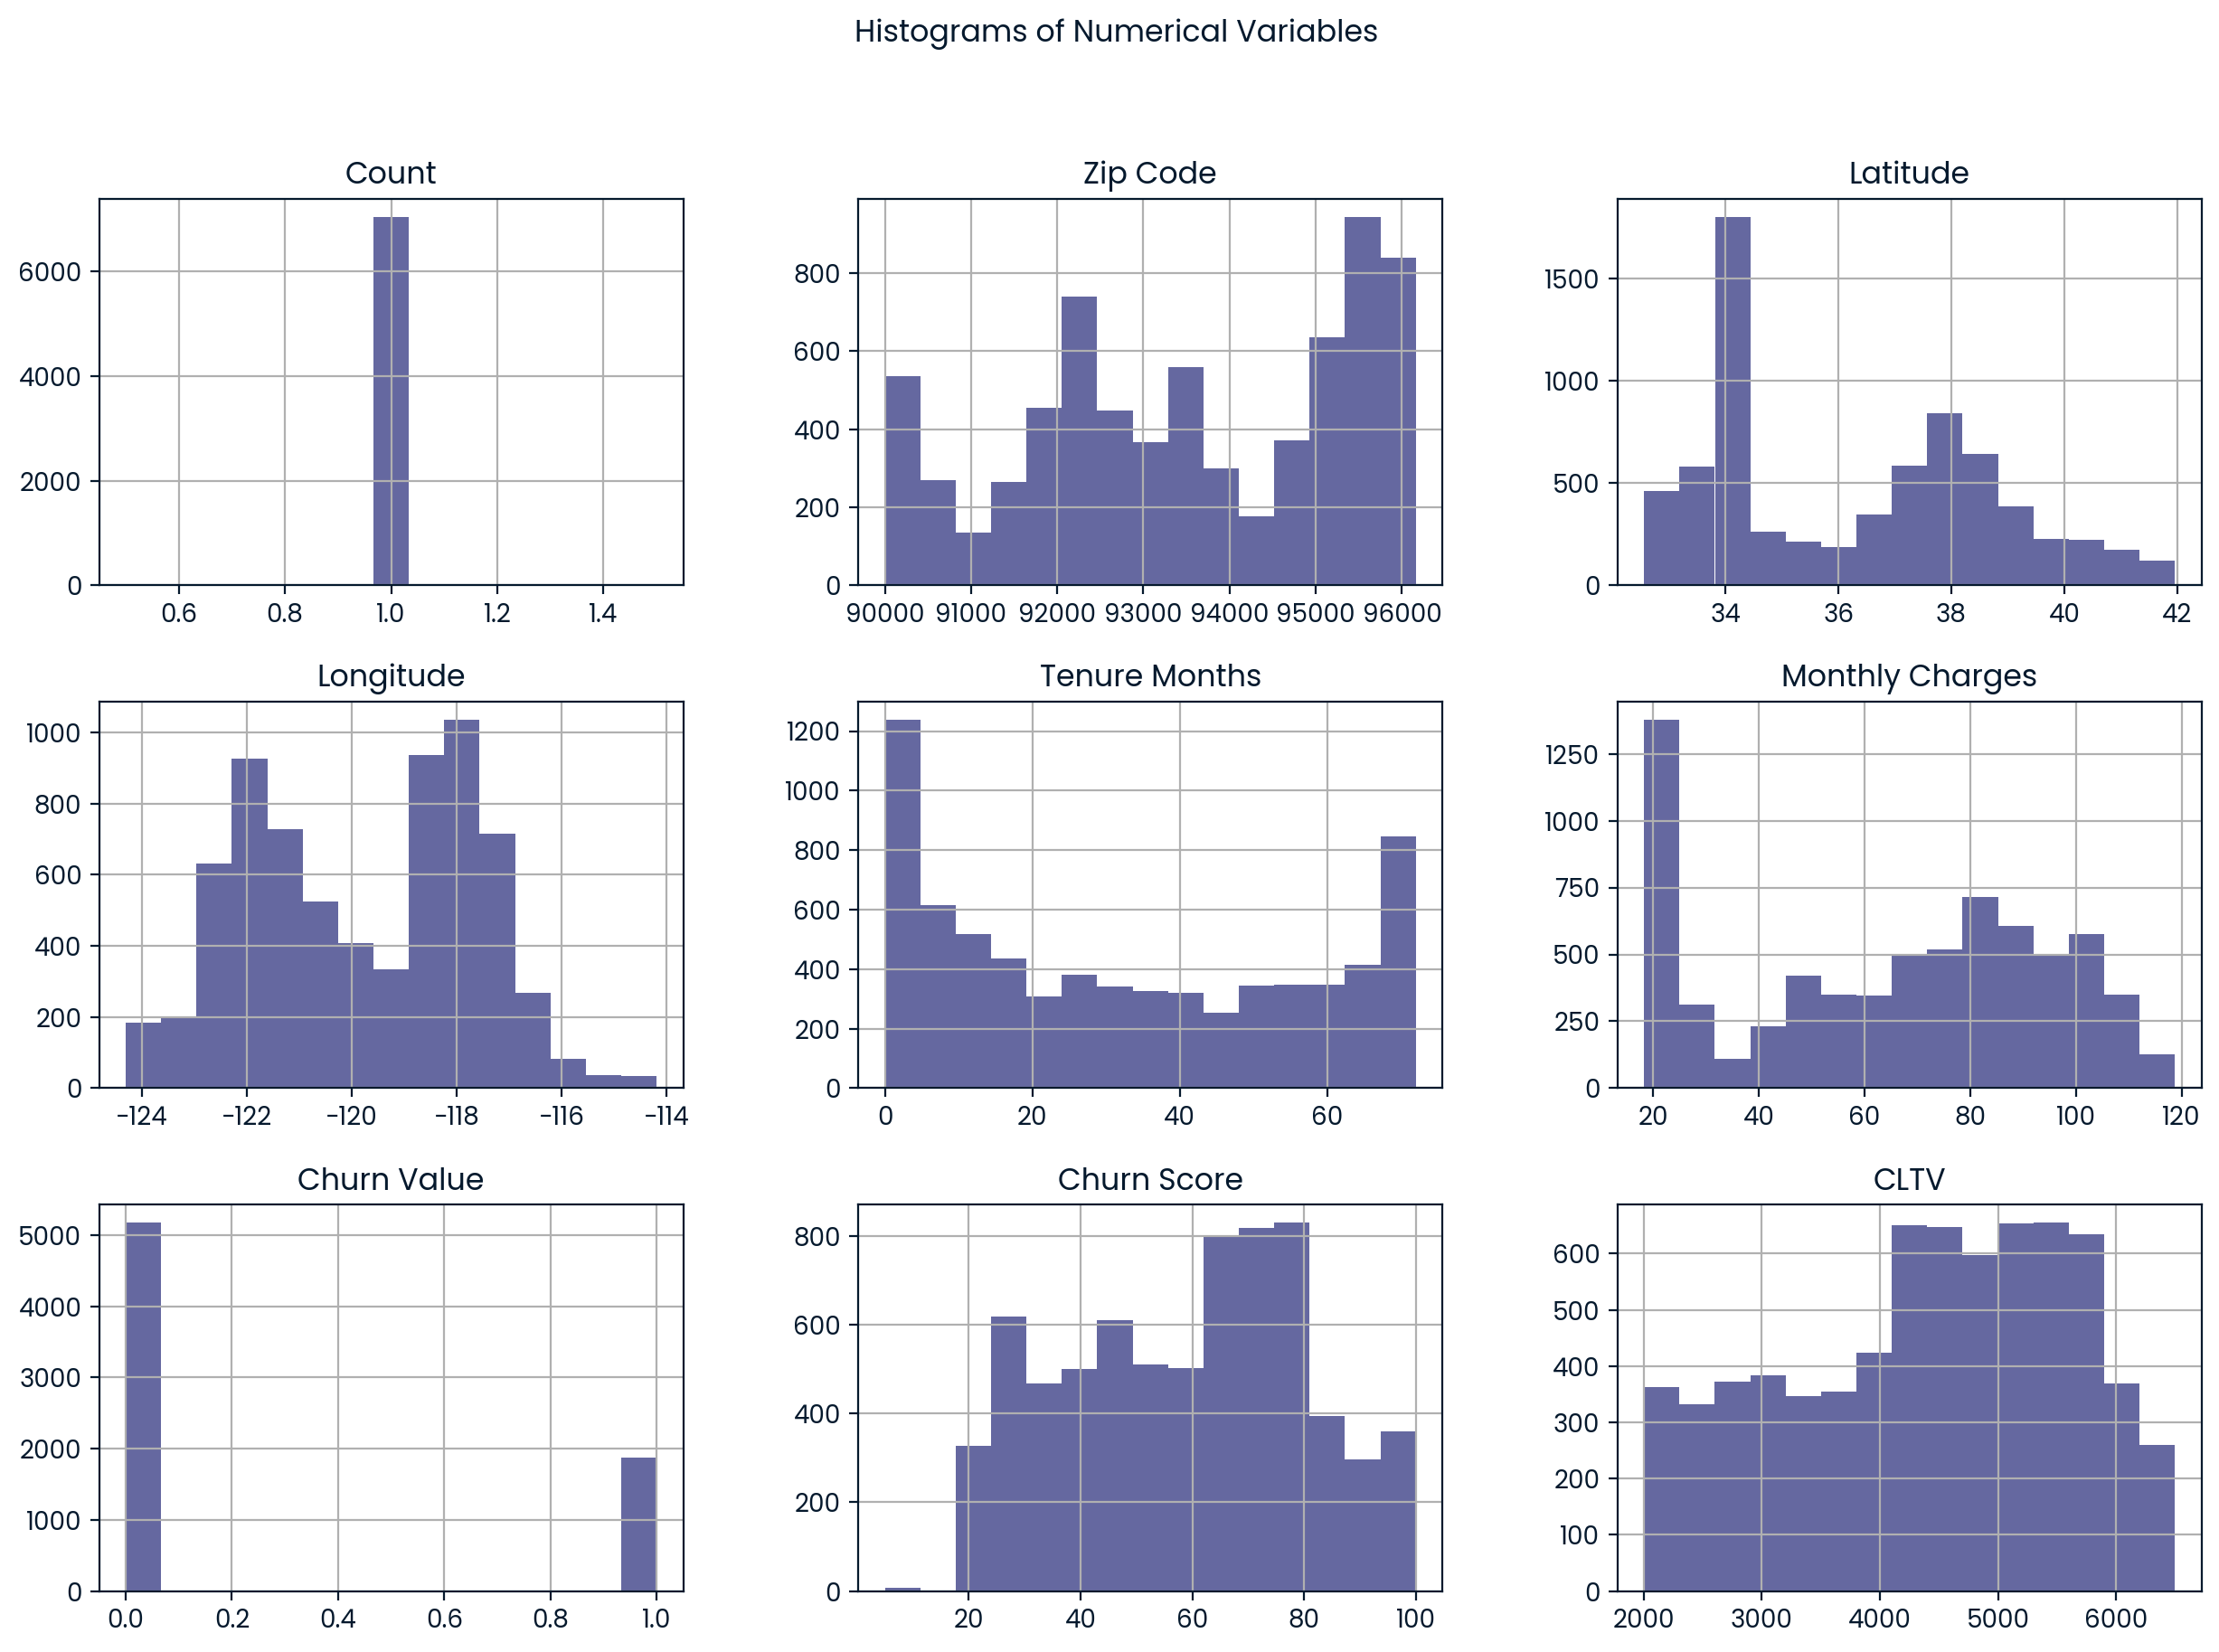

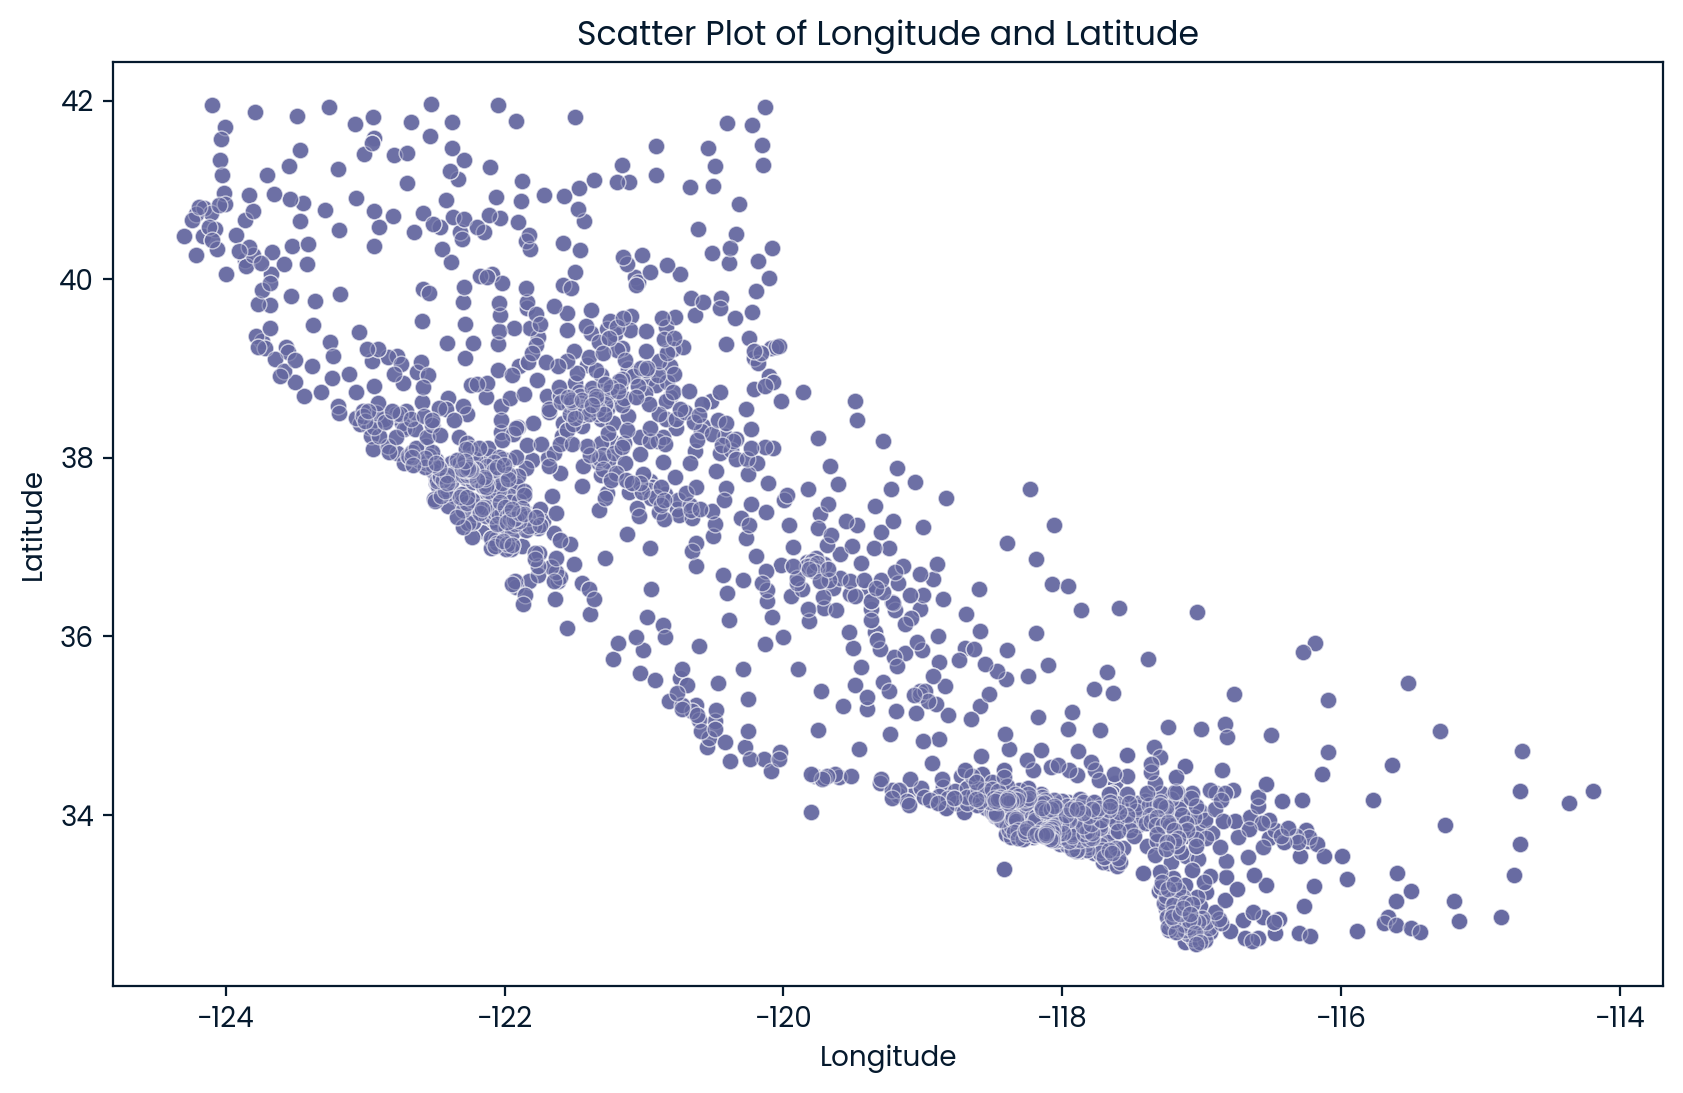

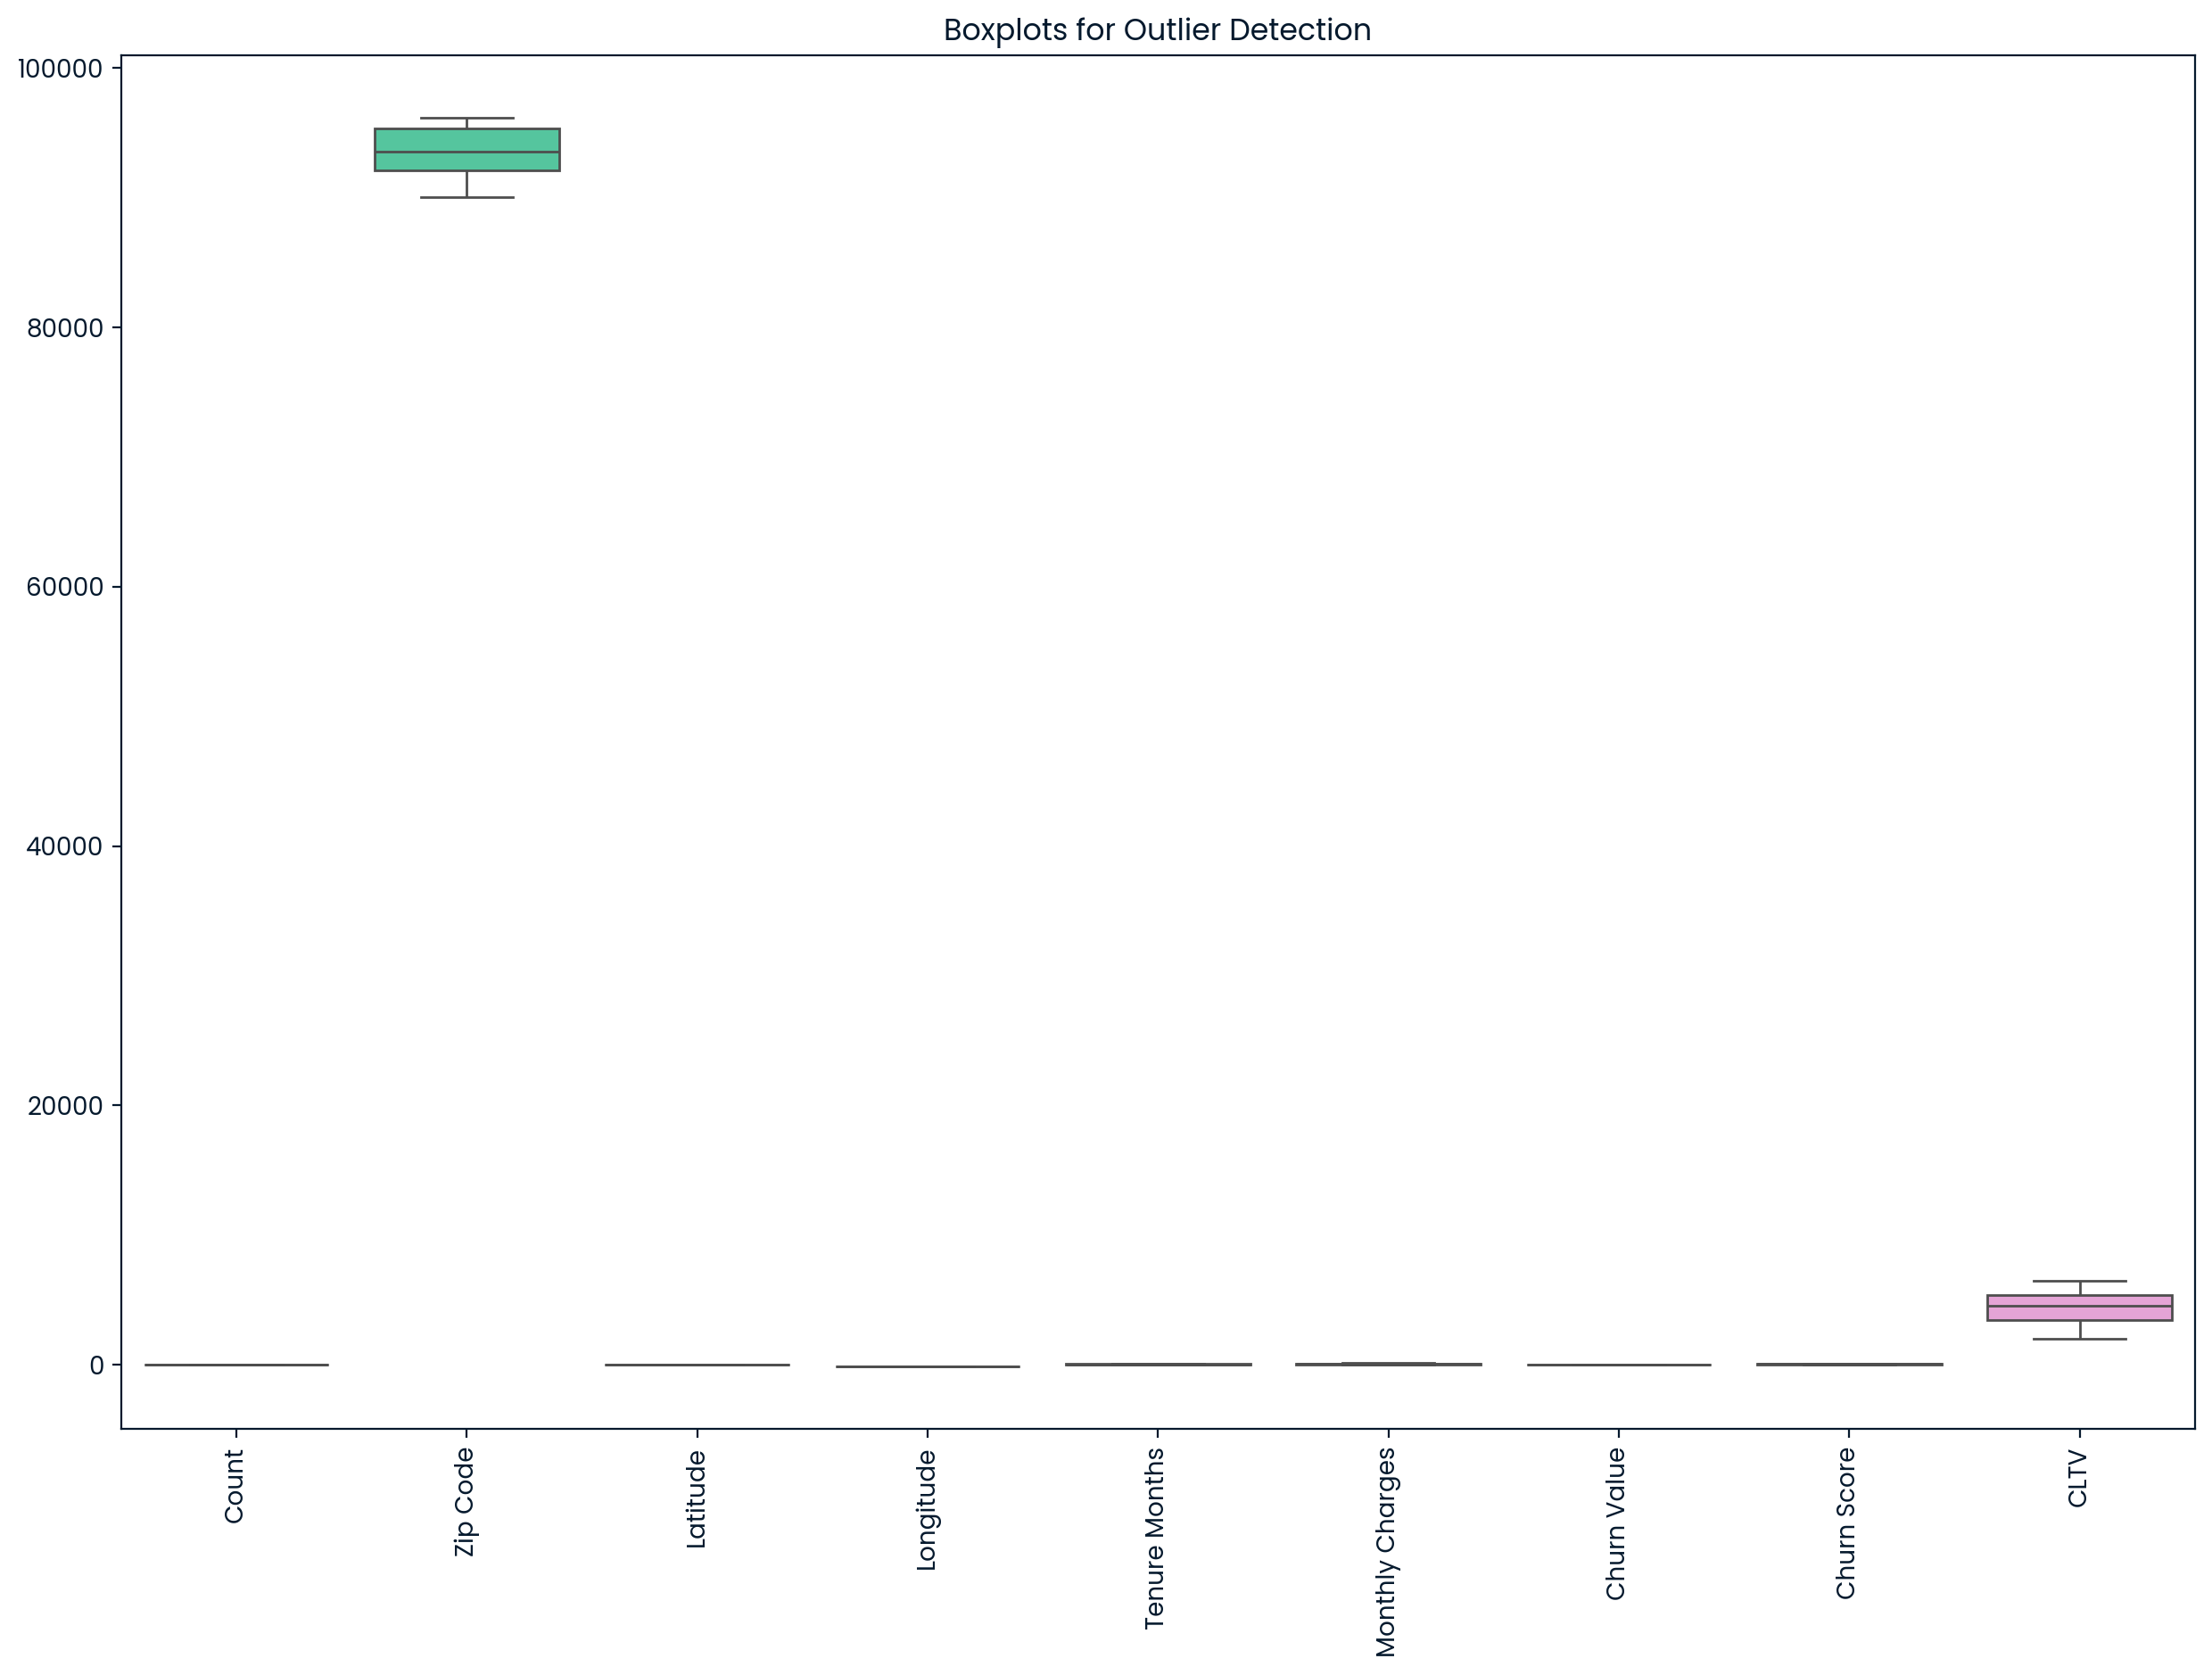

There are 0 outliers


In [224]:
import pandas as pd

# Summary statistics for numerical data
summary_stats = customer_churn.describe()

# Median for numerical columns
medians = customer_churn.select_dtypes(include=['number']).median()

# Additional summary statistics
variances = customer_churn.select_dtypes(include=['number']).var()
skewness = customer_churn.select_dtypes(include=['number']).skew()
kurtosis = customer_churn.select_dtypes(include=['number']).kurt()
iqr = customer_churn.select_dtypes(include=['number']).apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Combine all statistics into a single DataFrame
additional_stats = pd.DataFrame({
    'Variance': variances,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'IQR': iqr
})

# Display the summary statistics and additional statistics
print(summary_stats)
print(medians)
print(additional_stats)

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
customer_churn.select_dtypes(include=['number']).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

# Combined histogram for Longitude and Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=customer_churn, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Longitude and Latitude')
plt.show()

# Outlier detection using boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=customer_churn.select_dtypes(include=['number']))
plt.title('Boxplots for Outlier Detection')
plt.xticks(rotation=90)
plt.show()

# Outlier detection using IQR
Q1 = customer_churn.select_dtypes(include=['number']).quantile(0.25)
Q3 = customer_churn.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = ((customer_churn.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | 
            (customer_churn.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
total_outliers = outliers_count.sum()

# Display the number of outliers in each numerical column
print(f'There are {total_outliers} outliers')

## 2.4 Summary Statistics and visualizations for Categorical Variables 
### 2.4.1. Summary Statistics 
In this section, I analyzed the categorical variables in our dataset to understand their distributions. Below are the frequency counts, modes, and observations for each of the key categorical variables:

1. Churn Reason:
   - Most Frequent Reason: Attitude of Support Person (192 times)
   - Second Most Frequent Reason: Competitor Offered Higher Download Speed (189 times)
   - Observations: The churn reasons are diverse, with the leading reasons having close counts, indicating multiple significant factors for customer churn.

2. Churn Label:
   - No: 5,074 times
   - Yes: 1,969 times
   - Observations: A significant majority of customers did not churn, which could indicate overall customer satisfaction or other retention factors at play.

3. Payment Method:
   - Most Common Method: Electronic Check (2,355 times)
   - Observations: A high reliance on electronic checks could suggest a preference for digital payment methods among customers.

4. Contract:
   - Month-to-Month: 3,875 times
   - Observations: Most customers prefer month-to-month contracts, which could imply a need for more flexible contract options.

5. Streaming Movies:
   - No: 2,785 times
   - Observations: Slightly more customers do not subscribe to streaming movies, which might suggest limited interest or the need for better offerings.

6. Streaming TV:
   - No: 2,810 times
   - Observations: Similar to streaming movies, more customers opt out of streaming TV services.

7. Tech Support:
   - No: 3,473 times
   - Observations: A significant number of customers do not utilize tech support, which could indicate either good product usability or unawareness of support services.

8. Device Protection:
   - No: 3,095 times
   - Observations: More customers do not subscribe to device protection, potentially highlighting an area for better marketing or bundling of services.

9. Online Backup:
    - No: 3,088 times
    - Observations: Most customers do not use online backup services, suggesting either low perceived value or insufficient promotion.

10. Online Security:
    - No: 3,498 times
    - Observations: A majority do not subscribe to online security services, which could be a critical area for upselling.

11. Internet Service:
    - Fiber Optics: 3,096 times
    - Observations: Fiber optics is the most common internet service, indicating customer preference for high-speed internet.

12. Multiple Lines:
    - No: 3,319 times
    - Observations: Most customers do not use multiple lines, suggesting a trend towards single-line usage.

13. Phone Service:
    - Yes: 6,361 times
    - Observations: A large majority of customers use phone services, highlighting it as a core service offerings

14. Senior Citizen:
    - No: 5,901 times
    - Observations: The majority are not senior citizens, potentially indicating a younger demographic.

15. Gender:
    - Male: 3,555 times
    - Observations: There is a slight male majority among customers.

16. City:
    - Most Common City: Los Angeles (305 times)
    - Observations: The dataset includes customers from many cities, with Los Angeles having the highest representation.

17. State:
    - Most Common State: California (4,043 times)
    - Observations: California is the most represented state in the dataset.

18. Missing Values:
    - All variables except "Churn Reason" have no missing values.
    - "Churn Reason" has 5,074 missing values.
    - Observations: The dataset is mostly complete, with missing values primarily in the "Churn Reason" variable.

19. Unique Counts:
    - "City" has 1,129 unique values.
    - "Longitude" has 1,652 unique values.
    - "Total Charges" has 6,531 unique values.
    - "Churn Reason" has 20 unique values.
    - Remaining variables have between 2, 3, and 4 unique values.
    - Observations: The dataset has high variability in location-based attributes and charges, indicating diverse customer profiles.

In [225]:
# Selecting categorical columns 
categorical_columns = customer_churn.select_dtypes(include=['object']).drop(columns = ['Lat Long']).columns

# Frequency counts for each categorical variable
for column in categorical_columns:
    print(f"Frequency count for {column}:\n{customer_churn[column].value_counts()}\n")

# Mode for each categorical variable
for column in categorical_columns:
    print(f"Mode for {column}: {customer_churn[column].mode()[0]}")
    
# Summary statistics for Categorical variables 
categorical_summary = customer_churn.describe(include=['object', 'bool'])
print(categorical_summary)

# Count of unique values
unique_counts = customer_churn[categorical_columns].nunique()
print("Unique counts for categorical variables:\n", unique_counts)

# Count of missing values
missing_values = customer_churn.isnull().sum()
print("Missing values in each column:\n", missing_values)

Frequency count for CustomerID:
CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Frequency count for Country:
Country
United States    7043
Name: count, dtype: int64

Frequency count for State:
State
California    7043
Name: count, dtype: int64

Frequency count for City:
City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

Frequency count for Gender:
Gender
Male      3555
Female    3488
Name: count, dtype: int64

Frequency count for Senior Citizen:
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

Frequency count for Partner:
Partner
No     3641
Yes    3402
Name: 

### 2.4.2. Visualizations
To better understand these distributions, I utilized frequency bar plots with percentage annotations. I also made use of pie charts for the distributions of churn label, payment method and contract. These visualizations help identify the most common categories and their relative proportions. Below are the combined subplots for each categorical variable and pie charts :


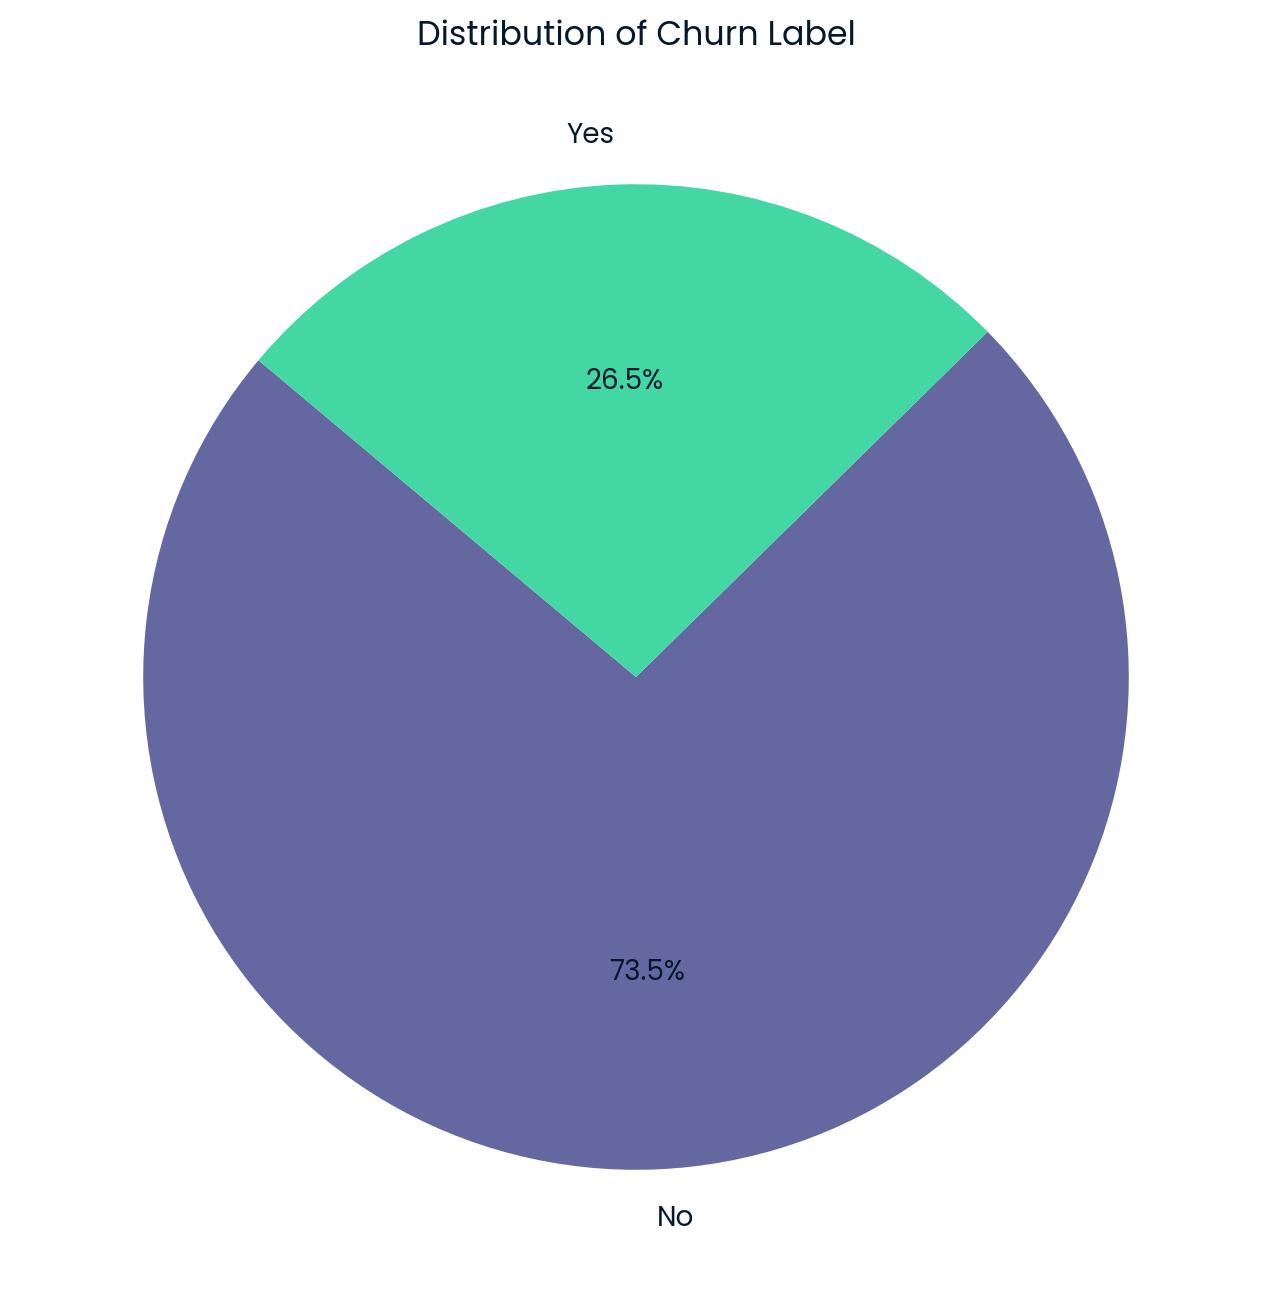

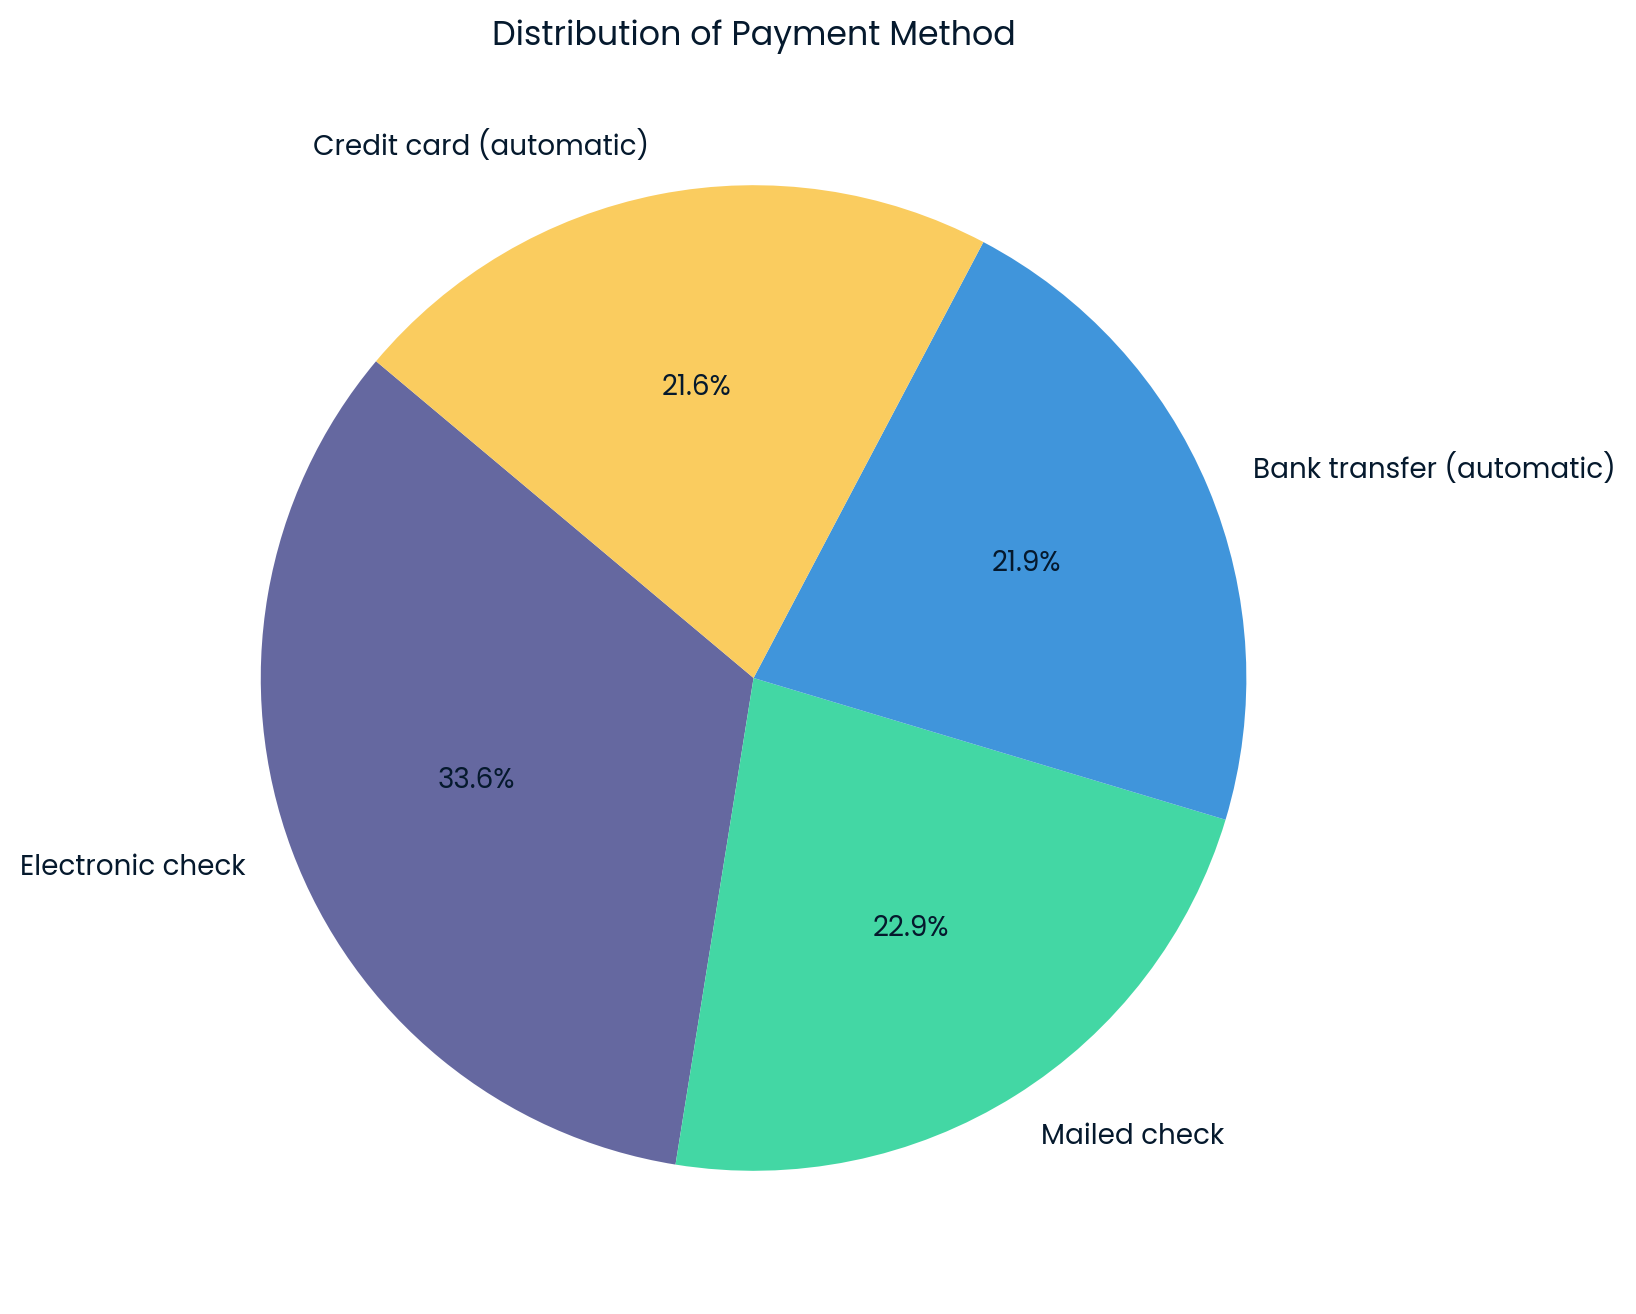

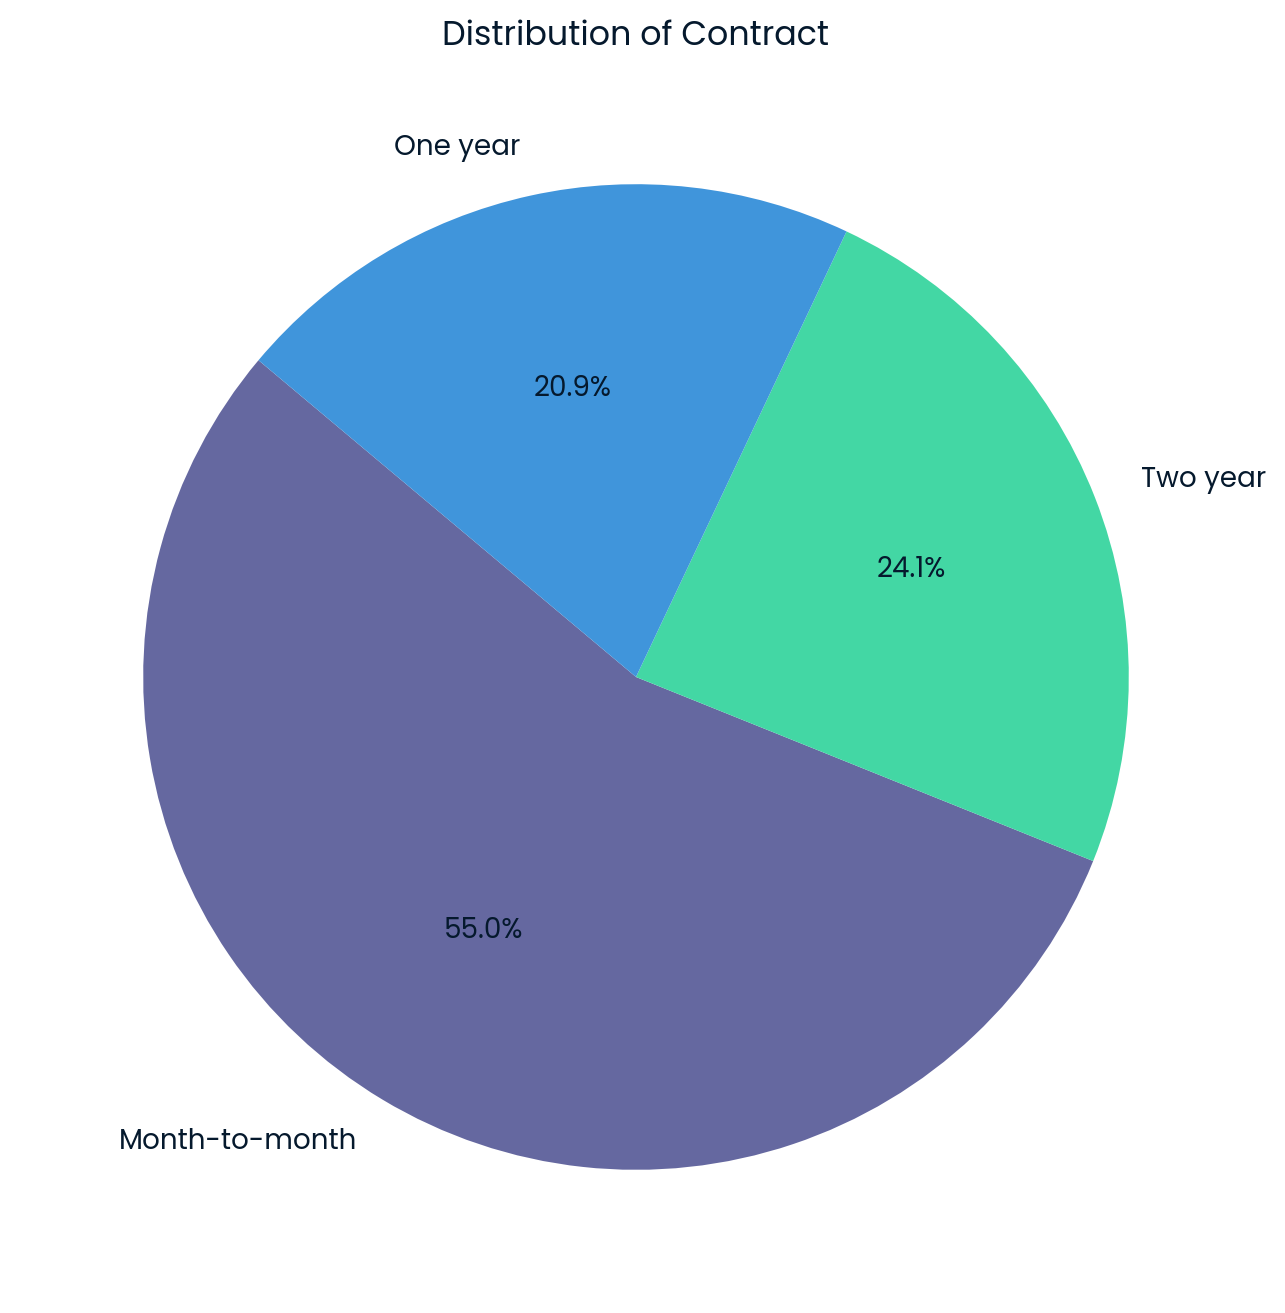

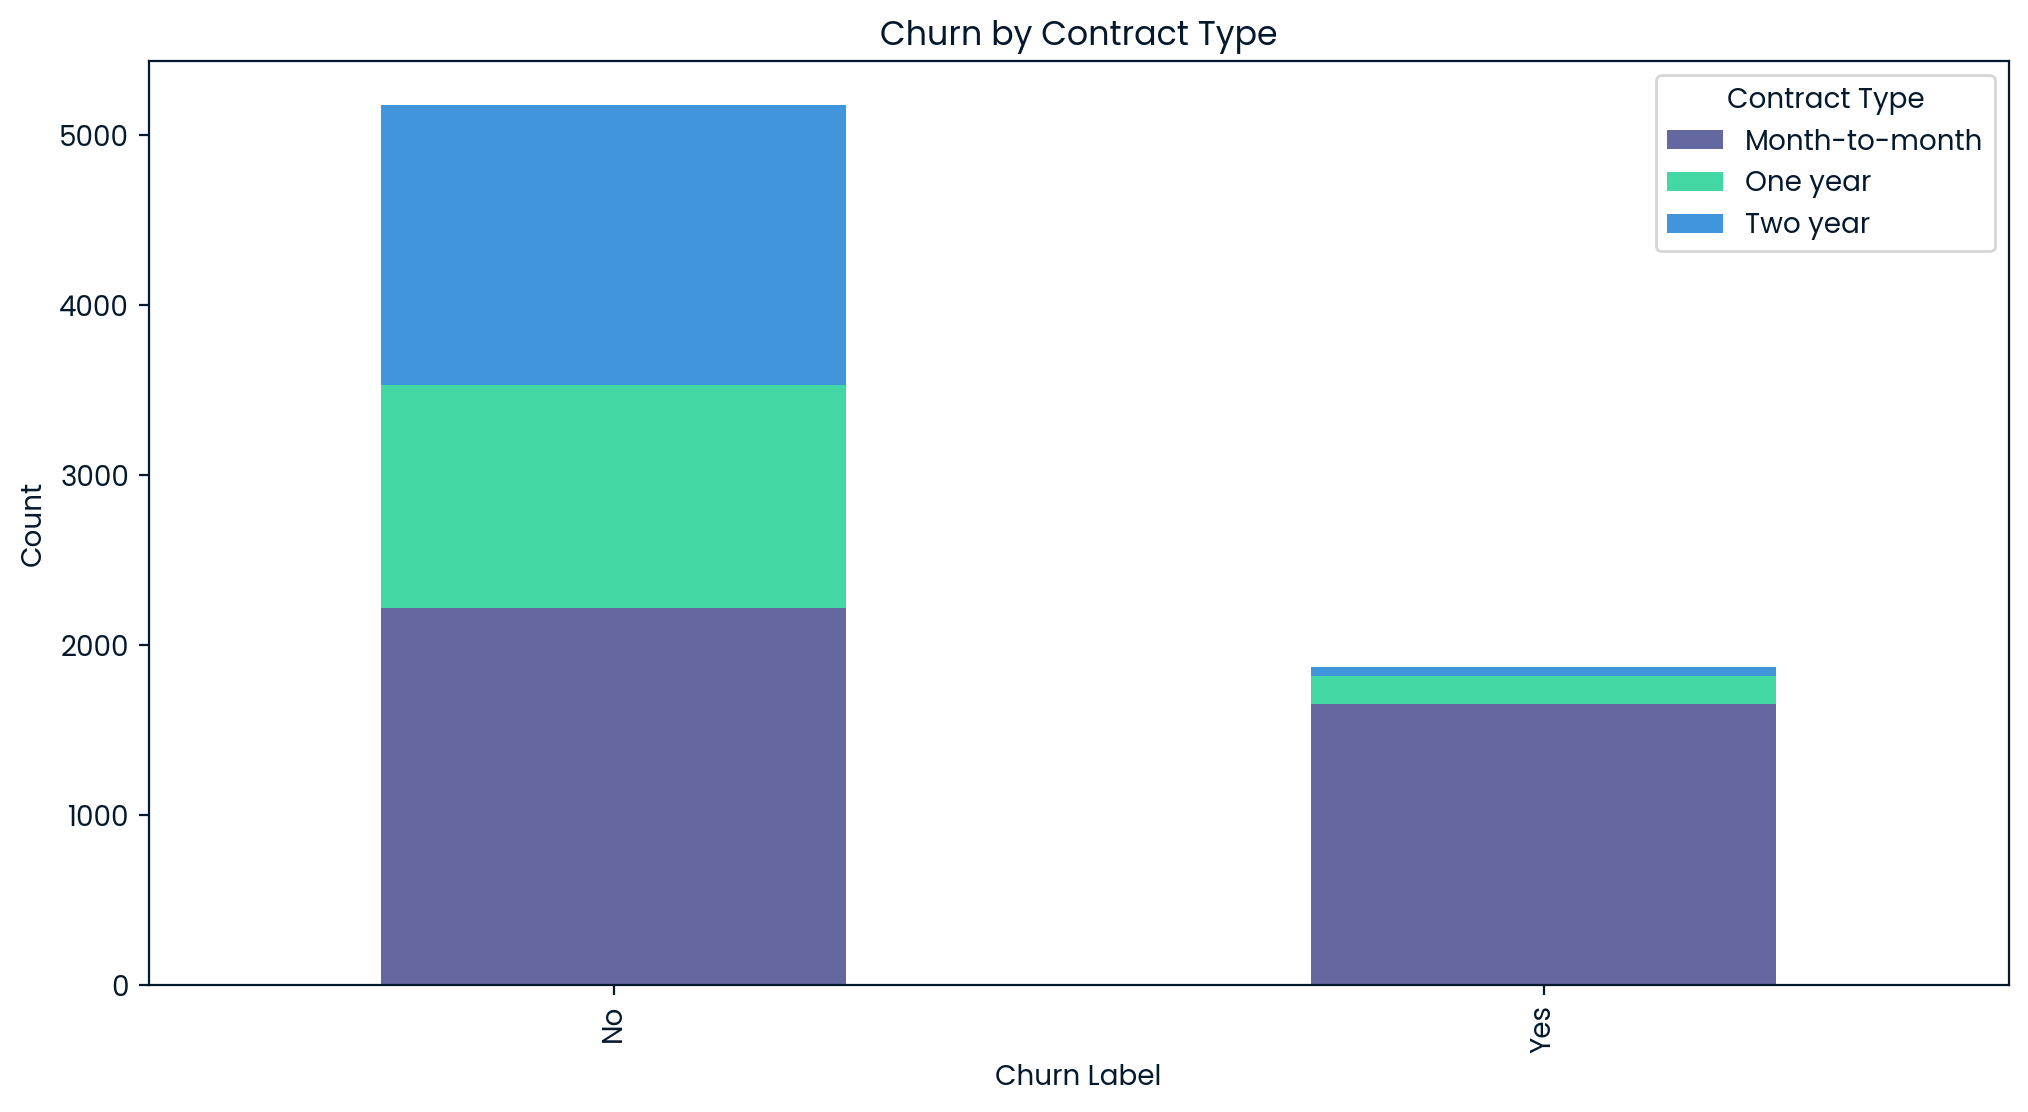

In [226]:
# Categorical columns
categorical_columns = [
    'Churn Reason', 'Churn Label', 'Payment Method', 'Paperless Billing', 'Contract',
    'Streaming Movies', 'Streaming TV', 'Tech Support', 'Device Protection',
    'Online Backup', 'Online Security', 'Internet Service', 'Multiple Lines',
    'Phone Service', 'Dependents', 'Partner', 'Senior Citizen', 'Gender',
]

# Frequency Counts and Count Plots with Percentage in Subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(24, 6 * len(categorical_columns)))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    # Frequency Counts - Bar Plot
    sns.countplot(y=column, data=customer_churn, order=customer_churn[column].value_counts().index, ax=axes[i, 0])
    axes[i, 0].set_title(f'Frequency of {column}')
    axes[i, 0].set_xlabel('Count')
    axes[i, 0].set_ylabel(column)
    
    # Count Plots with Percentage
    ax = sns.countplot(x=column, data=customer_churn, order=customer_churn[column].value_counts().index, ax=axes[i, 1])
    total = len(customer_churn[column])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')
    ax.set_title(f'Percentage of {column}')
    ax.set_ylabel('Count')
    ax.set_xlabel(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

# Pie Charts for a few variables
pie_chart_columns = ['Churn Label', 'Payment Method', 'Contract']
for column in pie_chart_columns:
    plt.figure(figsize=(8, 8))
    customer_churn[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

# Stacked Bar Chart example: Churn by Contract Type
plt.figure(figsize=(12, 6))
pd.crosstab(customer_churn['Churn Label'], customer_churn['Contract']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Churn by Contract Type')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.legend(title='Contract Type')
plt.show()

### 2.4.3. Suggestions Based on Analysis of Categorical variables 
It’s essential to provide actionable insights based on the analysis. Here are some suggestions:

1. Focus on High Churn Reasons:
   - Address the top churn reasons, such as the attitude of support personnel and competitor offers. Improving support quality and competitive pricing could reduce churn.

2. Promote Digital Payments:
   - With electronic checks being the most common payment method, encouraging more digital payments could streamline billing and reduce costs.

3. Flexible Contract Options:
   - The preference for month-to-month contracts suggests a need for more flexible contract options. Offering attractive month-to-month plans could retain customers who prefer flexibility.

4. Enhance Streaming Services:
   - With a significant number of customers not subscribing to streaming services, improving the quality and variety of streaming options could attract more subscribers.

5. Market Additional Services:
   - Services like tech support, device protection, and online security have lower subscription rates. Better marketing and bundling these services could increase their adoption.

6. Targeted Marketing Campaigns:
   - Use demographic information such as gender, senior citizen status, and partner status to design targeted marketing campaigns that resonate with different customer segments.



# 3. Data Cleaning and Preprocessing
### 3.1. Handling Missing Values 
This is to ensure that the dataset is complete and that the machine learning model can learn effectively from the data without being biased or skewed by missing entries.

In [227]:
# Fill missing values in the 'Churn Reason' column
customer_churn['Churn Reason'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
print(customer_churn.isnull().sum())

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64


### 3.2. Encoding Categorical Variables
This is to transform categorical data into a numerical format without losing the important  information.

In [228]:
# List of categorical columns to encode
categorical_columns = ['Country', 'State', 'City', 'Zip Code', 'Gender', 'Senior Citizen', 
                       'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 
                       'Internet Service', 'Streaming TV', 'Streaming Movies', 
                       'Contract', 'Paperless Billing', 'Payment Method', 
                       'Online Security', 'Online Backup', 'Device Protection', 
                       'Tech Support', 'Churn Reason']

# Apply pd.get_dummies to each categorical column
customer_churn = pd.get_dummies(customer_churn, columns=categorical_columns)

# Verify the changes
customer_churn.head()

CustomerID  ...  Churn Reason_Unknown
0  3668-QPYBK  ...                 False
1  9237-HQITU  ...                 False
2  9305-CDSKC  ...                 False
3  7892-POOKP  ...                 False
4  0280-XJGEX  ...                 False

[5 rows x 2859 columns]

## 3.3. Normalizing Numerical Columns 


In [229]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# List of numerical columns to standardize
numerical_columns = ['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

# Initialize StandardScaler
scaler = StandardScaler()

# Clean the data by replacing empty strings with NaN and then filling NaN with the mean of the column
customer_churn[numerical_columns] = customer_churn[numerical_columns].replace(' ', pd.NA)
customer_churn[numerical_columns] = customer_churn[numerical_columns].apply(pd.to_numeric, errors='coerce')
customer_churn[numerical_columns] = customer_churn[numerical_columns].fillna(customer_churn[numerical_columns].mean())

# Apply StandardScaler to the numerical columns
customer_churn[numerical_columns] = scaler.fit_transform(customer_churn[numerical_columns])

# Verify the changes
print(customer_churn.head())

   CustomerID  ...  Churn Reason_Unknown
0  3668-QPYBK  ...                 False
1  9237-HQITU  ...                 False
2  9305-CDSKC  ...                 False
3  7892-POOKP  ...                 False
4  0280-XJGEX  ...                 False

[5 rows x 2859 columns]


# 4. Feature Engineering 
## 4.1. Customer Characteristics 
We created a new column Num_Additional_Services that sums the number of additional services a customer has subscribed to.

In [231]:
# List of columns related to additional services
online_security_cols = ['Online Security_No', 'Online Security_No internet service', 'Online Security_Yes']
online_backup_cols = ['Online Backup_No', 'Online Backup_No internet service', 'Online Backup_Yes']
device_protection_cols = ['Device Protection_No', 'Device Protection_No internet service', 'Device Protection_Yes']
tech_support_cols = ['Tech Support_No', 'Tech Support_No internet service', 'Tech Support_Yes']

# Create new columns representing if a service is subscribed (1) or not (0)
customer_churn['online_security'] = np.where(customer_churn['Online Security_Yes'] == 'Yes', 1, 0)
customer_churn['online_backup'] = np.where(customer_churn['Online Backup_Yes'] == 'Yes', 1, 0)
customer_churn['device_protection'] = np.where(customer_churn['Device Protection_Yes'] == 'Yes', 1, 0)
customer_churn['tech_support'] = np.where(customer_churn['Tech Support_Yes'] == 'Yes', 1, 0)

# Create a new feature 'Num_Additional_Services' that sums up the number of additional services
customer_churn['Num_Additional_Services'] = customer_churn[['online_security', 'online_backup', 'device_protection', 'tech_support']].sum(axis=1)

# Drop the intermediate binary columns if needed
customer_churn.drop(columns=['online_security', 'online_backup', 'device_protection', 'tech_support'], inplace=True)

# Optionally, drop the original columns used to create the binary columns
customer_churn.drop(columns=online_security_cols + online_backup_cols + device_protection_cols + tech_support_cols, inplace=True)

# Now df contains the new feature 'Num_Additional_Services'
print(customer_churn[['Num_Additional_Services']].head())

   Num_Additional_Services
0                        0
1                        0
2                        0
3                        0
4                        0


## 4.2. Normalizing Numerical Columns
I used StandardScaler to standardize the Monthly Charge and Total Charges columns, ensuring that they have a mean of 0 and a standard deviation of 1.

In [232]:
# Normalize numerical columns
scaler = StandardScaler()

# Convert 'Total Charges' to numeric, forcing errors to NaN
customer_churn['Total Charges'] = pd.to_numeric(customer_churn['Total Charges'], errors='coerce')

# Fill NaN values with 0 or any other appropriate value
customer_churn['Total Charges'].fillna(0, inplace=True)

customer_churn[['Monthly Charges', 'Total Charges']] = scaler.fit_transform(customer_churn[['Monthly Charges', 'Total Charges']])

## 4.3. Average Charge Per Month
I calculated the Avg_Charge_Per_Month by dividing the Total Charges by the Tenure Months.

In [233]:
# Create average charge per month feature
customer_churn['Avg_Charge_Per_Month'] = customer_churn['Total Charges'] / customer_churn['Tenure Months']

## 4.4. Normalizing Churn Score and CLTV
I used StandardScaler to standardize the Churn Score and CLTV columns.

In [234]:
# Normalize Churn Score and CLTV
customer_churn[['Churn Score', 'CLTV']] = scaler.fit_transform(customer_churn[['Churn Score', 'CLTV']])

## 4.5. Dropping Irrelevant Columns
I dropped columns that are not relevant for the prediction model to clean up the dataset.

In [235]:
# Drop irrelevant columns by keeping only the necessary columns
necessary_columns = ['Avg_Charge_Per_Month', 'Churn Score', 'CLTV', 'Churn Label']
customer_churn = customer_churn[necessary_columns]

# 5. Model Development 
## 5.1. Splitting the Dataset
First, I'll split the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [236]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = customer_churn.drop('Churn Label', axis=1)
y = customer_churn['Churn Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (5634, 3), (5634,)
Testing set shape: (1409, 3), (1409,)


## 5.2. Building and Training a Logistic Regression Model
I decided to make use of a Logistic Regression model because of its efficiency in handling binary outcomes, interpretability of results, and computational efficiency. It provides a solid foundation for understanding the factors influencing churn and can serve as a baseline for comparison with more complex models. To begin created an instance of the LogisticRegression model. Then, I trained the model using the training data with the fit method.

In [237]:
from sklearn.linear_model import LogisticRegression

# Since pd.get_dummies has already been used, there's no need for LabelEncoder
# The categorical variables should already be one-hot encoded

# Instantiate the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 5.3. Model Evaluation 
After building and training the logistic regression model, I evaluated its performance using several key metrics:

1. Accuracy: This metric measures the proportion of correctly predicted instances out of the total instances. It provides an overall sense of how well the model performs, although it may not be fully indicative of performance on imbalanced datasets.

2. Precision: Precision indicates the proportion of true positive predictions out of all positive predictions made by the model. This metric is particularly useful when the cost of false positives is high.

3. Recall: Recall measures the proportion of true positive predictions out of all actual positive instances. This is important in scenarios where missing a positive instance (false negatives) is costly.

4. F1 Score: The F1 Score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. It is especially useful when there is an uneven class distribution.

5. ROC AUC Score: The ROC AUC score represents the model's ability to distinguish between the positive and negative classes. A higher score indicates better overall performance.

6. Confusion Matrix: The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives. It helps in understanding the types of errors the model makes.

7. Classification Report: The classification report provides detailed metrics for each class, including precision, recall, and F1 score, offering a deeper evaluation of model performance across different categories.

8. ROC Curve: The ROC curve plots the true positive rate against the false positive rate at various threshold settings, illustrating the trade-off between sensitivity and specificity. The area under the ROC curve (AUC) represents the overall performance of the model.

By using these evaluation metrics, we gain a comprehensive understanding of our logistic regression model's performance, identifying strengths and areas for potential improvement.

Accuracy: 0.84
Precision: 0.7556818181818182
Recall: 0.665
F1 Score: 0.7074468085106383
ROC AUC Score: 0.7898835480673934
ROC-AUC Score: 0.93
Confusion Matrix:
[[923  86]
 [134 266]]
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.91      0.89      1009
         Yes       0.76      0.67      0.71       400

    accuracy                           0.84      1409
   macro avg       0.81      0.79      0.80      1409
weighted avg       0.84      0.84      0.84      1409



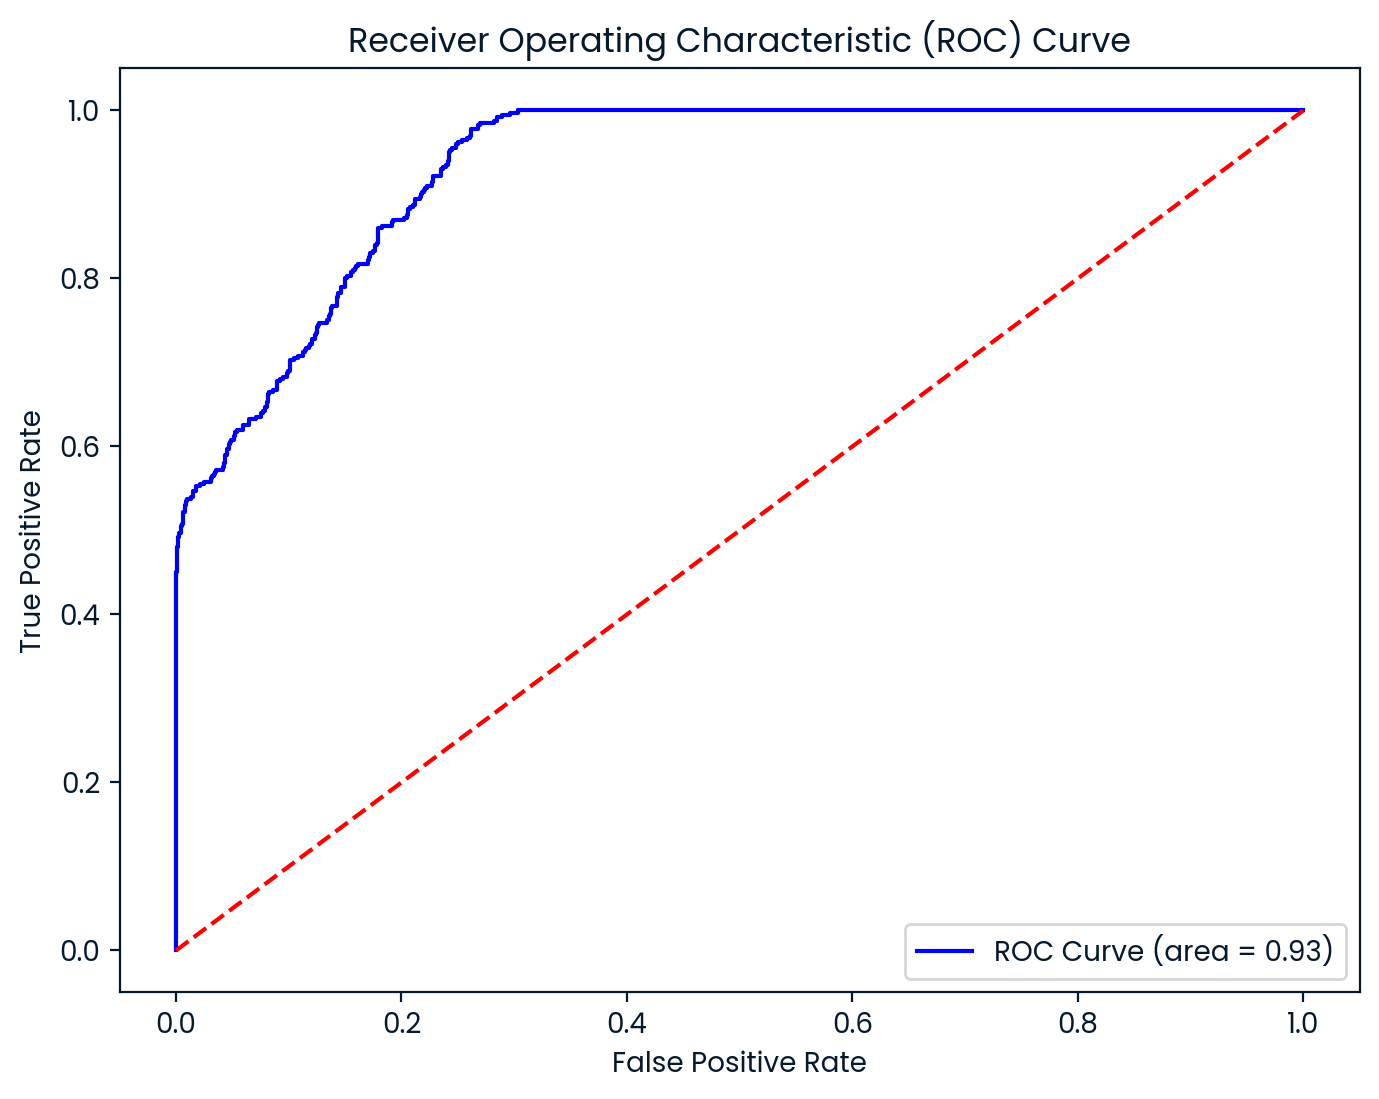

In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# If y_test and y_pred are numpy arrays, convert them to pandas Series
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Convert categorical labels to numerical labels
y_test_num = y_test_series.map({'No': 0, 'Yes': 1})
y_pred_num = y_pred_series.map({'No': 0, 'Yes': 1})

# Calculate metrics
precision = precision_score(y_test_num, y_pred_num)
recall = recall_score(y_test_num, y_pred_num)
f1 = f1_score(y_test_num, y_pred_num)
roc_auc = roc_auc_score(y_test_num, y_pred_num)


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# ROC Curve
# Assuming y_prob contains the predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test_num, y_prob, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 6. Interpretation of Model Performance
## 6.1. Accuracy
Accuracy: 0.84

Accuracy measures the proportion of correctly predicted instances out of the total instances. An accuracy of 0.84 means that the model correctly predicts the customer churn status 84% of the time.

## 6.2. Precision, Recall, and F1 Score
- Precision: 0.7556
- Recall: 0.665
- F1 Score: 0.7075

Precision indicates the proportion of true positive predictions among all positive predictions. A precision of 0.7556 means that when the model predicts a customer will churn, it is correct about 75.56% of the time.

Recall measures the proportion of true positive predictions among all actual positive instances. A recall of 0.665 means the model correctly identifies 66.5% of the customers who actually churn.

The F1 Score is the harmonic mean of precision and recall, providing a balance between the two metrics. An F1 Score of 0.7075 suggests a good balance between precision and recall.

## 6.3. ROC AUC Score
ROC AUC Score: 0.93

The ROC AUC Score measures the model's ability to distinguish between positive and negative classes. A score of 0.93 indicates excellent performance, with the model being able to discriminate between churned and non-churned customers with 93% accuracy.

## 6.4. Confusion Matrix
Confusion Matrix:
[[923  86]
 [134 266]]

The confusion matrix provides a detailed breakdown of the model's performance:
- True Negatives (923): Non-churned customers correctly identified.
- False Positives (86): Non-churned customers incorrectly identified as churned.
- False Negatives (134): Churned customers incorrectly identified as non-churned.
- True Positives (266): Churned customers correctly identified.

## 6.5. Classification Report
Classification Report:
              precision    recall  f1-score   support

           No       0.87      0.91      0.89      1009
          Yes       0.76      0.67      0.71       400

    accuracy                           0.84      1409
   macro avg       0.81      0.79      0.80      1409
weighted avg       0.84      0.84      0.84      1409


The classification report provides precision, recall, and F1 Score for each class (No and Yes). The support indicates the number of actual occurrences of each class in the dataset.

## 6.6. ROC Curve
The ROC Curve is a graphical representation of the model's performance across different threshold values. The curve plots the True Positive Rate (Recall) against the False Positive Rate. A higher area under the curve indicates better model performance.


# 7. Summary for Non-Data Practitioners
- Accuracy: The model predicts customer churn correctly 84% of the time.
- Precision: When the model predicts a customer will churn, it is correct 75.56% of the time.
- Recall: The model identifies 66.5% of the customers who actually churn.
- F1 Score: The model has a balanced performance between precision and recall.
- ROC AUC Score: The model has an excellent ability to distinguish between churned and non-churned customers, with a score of 0.93.
- Confusion Matrix: The model correctly identifies 923 non-churned and 266 churned customers, with 86 false positives and 134 false negatives.
- ROC Curve: The model shows excellent performance, as indicated by the high area under the curve.

By understanding these metrics, we can assess the model's strengths and weaknesses and identify areas for improvement to enhance customer retention strategies.
